In [ ]:
pip install pandas matplotlib seaborn scikit-learn plotly wordcloud shap


In [ ]:
# 1. Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import shap
import plotly.graph_objects as go
from math import pi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
path="WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


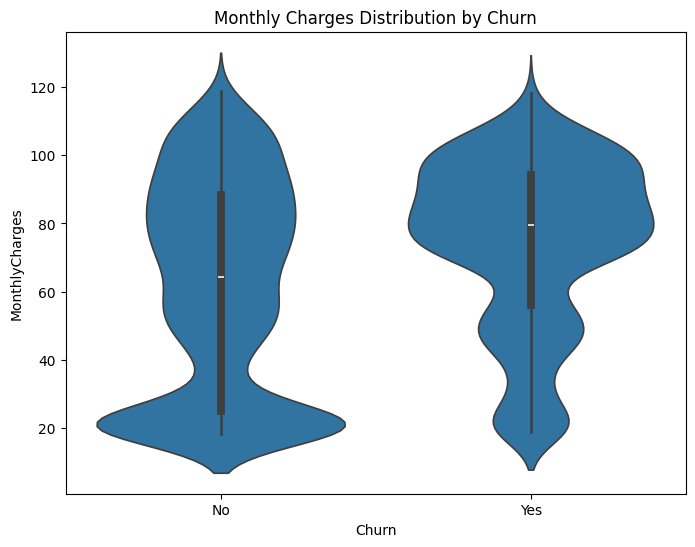

In [ ]:

#  Violin Plot

plt.figure(figsize=(8,6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


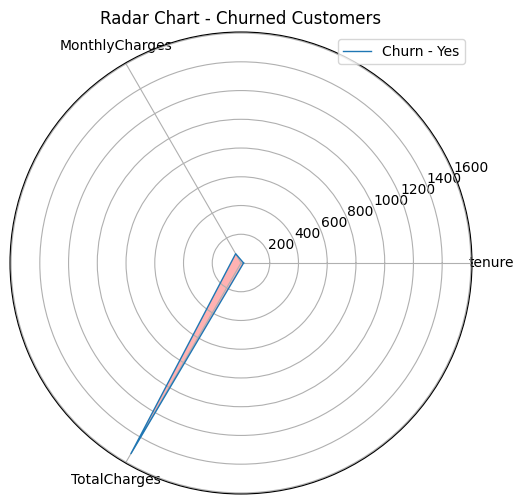

In [ ]:

#  Radar Chart

features = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_means = df[df['Churn'] == 'Yes'][features].mean()
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]
stats = churn_means.tolist()
stats += stats[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], features)

ax.plot(angles, stats, linewidth=1, linestyle='solid', label='Churn - Yes')
ax.fill(angles, stats, 'r', alpha=0.3)
plt.title('Radar Chart - Churned Customers')
plt.legend(loc='upper right')
plt.show()



In [ ]:

#  Word Cloud (if text column exists)

if 'customer_feedback' in df.columns:
    text = " ".join(str(i) for i in df[df['Churn']=='Yes']['customer_feedback'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Churned Customer Feedback")
    plt.show()
else:
    print("No 'customer_feedback' column found — skipping Word Cloud.")


No 'customer_feedback' column found — skipping Word Cloud.


In [ ]:

#  Sankey Diagram


labels = list(pd.unique(df['Contract'].tolist() + df['PaymentMethod'].tolist() + df['Churn'].tolist()))
label_dict = {k: v for v, k in enumerate(labels)}

source = []
target = []
value = []

# Contract → PaymentMethod
for contract in df['Contract'].unique():
    for method in df['PaymentMethod'].unique():
        count = df[(df['Contract'] == contract) & (df['PaymentMethod'] == method)].shape[0]
        if count > 0:
            source.append(label_dict[contract])
            target.append(label_dict[method])
            value.append(count)

# PaymentMethod → Churn
for method in df['PaymentMethod'].unique():
    for churn in df['Churn'].unique():
        count = df[(df['PaymentMethod'] == method) & (df['Churn'] == churn)].shape[0]
        if count > 0:
            source.append(label_dict[method])
            target.append(label_dict[churn])
            value.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Sankey Diagram: Contract → Payment → Churn", font_size=10)
fig.show()


<ipython-input-10-2dea44dc8c3c>:5: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels = list(pd.unique(df['Contract'].tolist() + df['PaymentMethod'].tolist() + df['Churn'].tolist()))
